# Script to create the figures in section 3.3.2

These figure should show the snowpack with the corresponding layers (classical figure).

In [ ]:
# TODO add options (ice detection, etc.) for params to be defined automatically (start_accumulation_times etc.)

## Imports and functions

In [21]:
%run little_awk_functions.py
%run parameters.py

## Define dataset and clean data

In [2]:
# Pre-processing to get clean data

data_set_used = xr.open_dataset('snow_pit_1_filled.nc')

data_set_used = data_set_used.ffill(dim='time')

median_space_filtering(data_set_used, 5, x_span=7)
median_time_filtering(data_set_used, 11)

data_set_used['snow_surface'] = data_set_used['snow_surface'] - data_set_used['snow_surface'].isel(x=x_sel, y=y_sel).dropna('time').min()


---> Median filtering in space with a window [7, 11]
---> Median filtering in time with a window of 11


## Get timing values

In [3]:
# Define dates

data_starting_date_in_ns = float(data_set_used.time.values[0])

data_starting_date_in_s = pd.to_datetime(data_set_used.time.values[0]).timestamp()
data_ending_date_in_s = pd.to_datetime(data_set_used.time.values[-1]).timestamp()
data_duration_in_s = data_ending_date_in_s - data_starting_date_in_s
nb_iterations = int(data_duration_in_s/dt + 1)

In [22]:
# Get timing of events

results = get_snow_events(data_set_used, x_sel, y_sel, time_window_std, std_threshold)
start_accumulation = results[0]
start_erosion = results[1]
end_accumulation = results[2]
end_erosion = results[3]

# Convert end times into more manageable orders of magnitude

end_accumulation_times = data_set_used.snow_surface.isel(x=x_sel, y=y_sel, time=end_accumulation)
end_accumulation_times = (pd.to_datetime(end_accumulation_times.time).astype(int) - data_starting_date_in_ns) / 1000000000  # in s

end_erosion_times = data_set_used.snow_surface.isel(x=x_sel, y=y_sel, time=end_erosion)
end_erosion_times = (pd.to_datetime(end_erosion_times.time).astype(int) - data_starting_date_in_ns) / 1000000000  # in s


## Simulate evolution of snowpack

In [23]:
# Simulate the snowpack

snowpack = simulate_snowpack_evolution(data_set_used, x_sel, y_sel, nb_iterations, end_accumulation_times, end_erosion_times,
                                       start_accumulation, end_accumulation, start_erosion, end_erosion, jj, dt, ro_layer, ro_water, ro_ice,
                                       t_old, tf, tsfc, dy_snow, age_layers, gamma, cp_snow, melt_flag, a1, a2, met_temp_data=met_temp,
                                       met_time_data=met_time, new_snow_ro=simul_new_snow_ro,
                                       fit_top_of_snowfall_to_curve=simul_fit_top_of_snowfall_to_curve)

ro_layer_evolution, depth_evolution, temperature_evolution = snowpack[0], snowpack[1], snowpack[2]


## Plot results

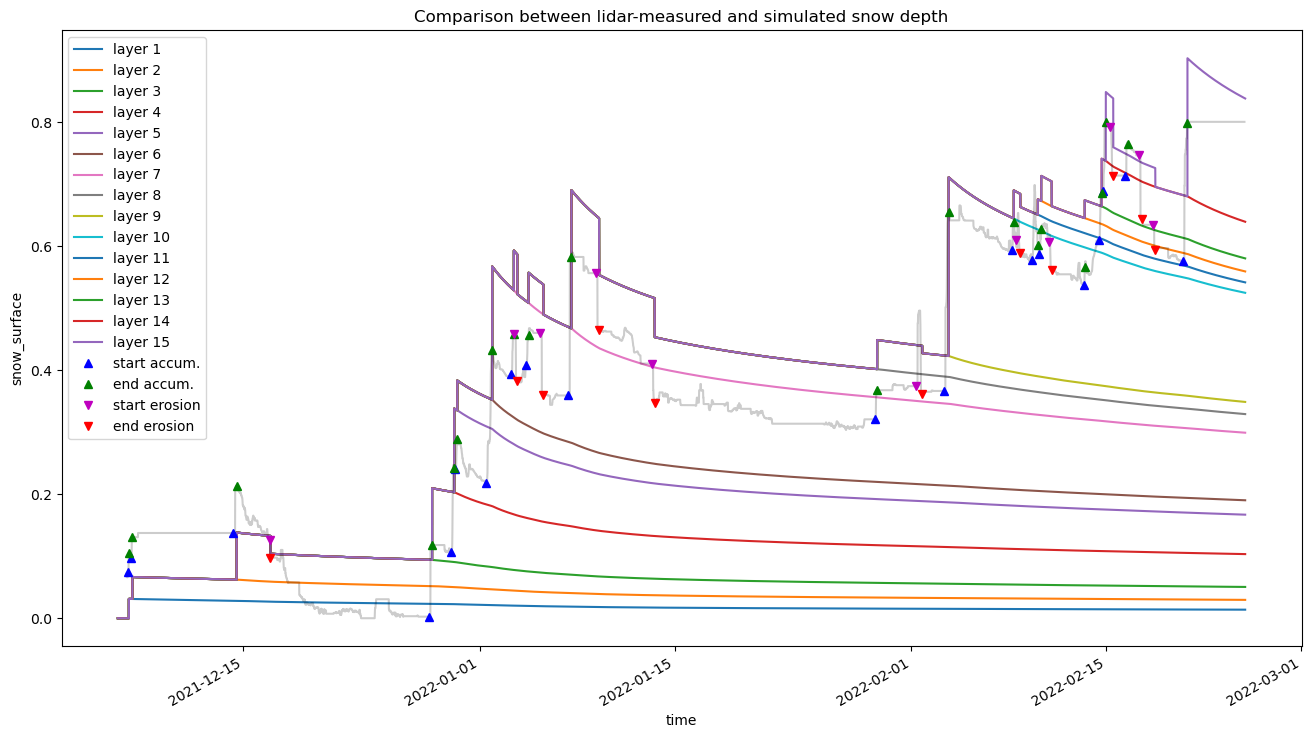

()

In [24]:
plot_simul_and_signal(data_set_used, x_sel, y_sel, depth_evolution, 15, pd.to_datetime('2021-12-06T00:00'), dt, nb_iterations,
                      start_accumulation, end_accumulation, start_erosion, end_erosion, my_figsize=(16, 8), save_file=False)

# TODO modular

In [8]:
# TODO modify names of axes, title, latex font